In [ ]:
#Q1读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数
import pandas as pd

file_path = r"C:\Users\flipp\Desktop\Dase导论\open_rank_20236.csv"
data = pd.read_csv(file_path)

top_100 = data[data['rank'] <= 100]

max_value = top_100['value'].max()
min_value = top_100['value'].min()
mean_value = top_100['value'].mean()
median_value = top_100['value'].median()

print(f"美国排名前100的项目的value最大值: {max_value}")
print(f"美国排名前100的项目的value最小值: {min_value}")
print(f"美国排名前100的项目的value均值: {mean_value:.2f}")
print(f"美国排名前100的项目的value中位数: {median_value:.2f}")

美国排名前100的项目的value最大值: 1394.45
美国排名前100的项目的value最小值: 200.68
美国排名前100的项目的value均值: 346.97
美国排名前100的项目的value中位数: 273.67


In [ ]:
#Q2
import pandas as pd

file_path = r"C:\Users\flipp\Desktop\Dase导论\activity_2022.csv"
data = pd.read_csv(file_path)

top_10 = data.head(10)

months = [
    '20221_value', '20222_value', '20223_value', '20224_value',
    '20225_value', '20226_value', '20227_value', '20228_value',
    '20229_value', '202210_value', '202211_value', '202212_value'
]

def calculate_growth_rate(row):
    values = row[months]
    values = values.dropna()
    growth_rates = (values.pct_change() * 100).dropna()
    return growth_rates.mean()

top_10['average_growth_rate'] = top_10.apply(calculate_growth_rate, axis=1)

for index, row in top_10.iterrows():
    project_name = row['repo']  
    average_growth_rate = row['average_growth_rate']
    print(f"项目 {project_name} 的平均增长率: {average_growth_rate:.2f}%")

项目 MicrosoftDocs/azure-docs 的平均增长率: -1.79%
项目 NixOS/nixpkgs 的平均增长率: 0.03%
项目 dotnet/runtime 的平均增长率: -2.28%
项目 elastic/kibana 的平均增长率: -0.37%
项目 firstcontributions/first-contributions 的平均增长率: 14.08%
项目 flutter/flutter 的平均增长率: -1.24%
项目 home-assistant/core 的平均增长率: 0.85%
项目 microsoft/vscode 的平均增长率: 2.29%
项目 pytorch/pytorch 的平均增长率: 1.32%
项目 rust-lang/rust 的平均增长率: -0.38%


C:\Users\flipp\AppData\Local\Temp\ipykernel_1876\946368506.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['average_growth_rate'] = top_10.apply(calculate_growth_rate, axis=1)


In [ ]:
#Q3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异

import pandas as pd

df_China = pd.read_csv(r"C:\Users\flipp\Desktop\Dase导论\global_2022.csv")
df_global = pd.read_csv(r"C:\Users\flipp\Desktop\Dase导论\china_2022.csv")

df_cleaned_China = df_China.dropna(subset=[col for col in df_China.columns if df_China[col].dtype in ['int64', 'float64']])
df_cleaned_global = df_global.dropna(subset=[col for col in df_global.columns if df_global[col].dtype in ['int64', 'float64']])

numeric_columns_China = df_cleaned_China.select_dtypes(include=['number']).columns
numeric_columns_Global = df_cleaned_global.select_dtypes(include=['number']).columns

common_columns = list(set(numeric_columns_China) & set(numeric_columns_Global))

for column in common_columns:
    # China
    max_num = df_cleaned_China[column].max()
    min_num = df_cleaned_China[column].min()
    max_project = df_cleaned_China.loc[df_cleaned_China[column] == max_num, 'name'].tolist()
    min_project = df_cleaned_China.loc[df_cleaned_China[column] == min_num, 'name'].tolist()
    median_num = df_cleaned_China[column].median()
    mean_num = df_cleaned_China[column].mean()

    # Global
    max_value = df_cleaned_global[column].max()
    min_value = df_cleaned_global[column].min()
    max_pro = df_cleaned_global.loc[df_cleaned_global[column] == max_value, 'name'].tolist()
    min_pro = df_cleaned_global.loc[df_cleaned_global[column] == min_value, 'name'].tolist()
    median_value = df_cleaned_global[column].median()
    mean_value = df_cleaned_global[column].mean()

    print(f"{column}")
    print(f"最大值:")
    print(f"  China: {max_num} （{', '.join(max_project)}）")
    print(f"  Global: {max_value} （{', '.join(max_pro)}）")
    print(f"最小值:")
    print(f"  China: {min_num} （{', '.join(min_project)}）")
    print(f"  Global: {min_value} （{', '.join(min_pro)}）")
    print(f"中位数:")
    print(f"  China: {median_num}   Global: {median_value}")
    print(f"均值:")
    print(f"  China: {mean_num}   Global: {mean_value}")
    print()

issue_comment
最大值:
  China: 1437317 （Microsoft）
  Global: 167814 （PingCAP）
最小值:
  China: 78530 （IBM）
  Global: 11741 （Deepin）
中位数:
  China: 178629.0   Global: 39141.0
均值:
  China: 341409.4   Global: 61205.5

merged_pull
最大值:
  China: 257123 （Microsoft）
  Global: 26732 （Alibaba）
最小值:
  China: 15418 （Meta）
  Global: 1165 （ESPRESSIF）
中位数:
  China: 33288.0   Global: 13705.5
均值:
  China: 62472.0   Global: 13764.1

value
最大值:
  China: 824848.67 （Microsoft）
  Global: 103368.49 （Alibaba）
最小值:
  China: 71636.82 （Baidu）
  Global: 12033.71 （Deepin）
中位数:
  China: 102790.85   Global: 29789.235
均值:
  China: 215855.491   Global: 40269.534

rank
最大值:
  China: 10 （Baidu）
  Global: 10 （Deepin）
最小值:
  China: 1 （Microsoft）
  Global: 1 （Alibaba）
中位数:
  China: 5.5   Global: 5.5
均值:
  China: 5.5   Global: 5.5

valueDelta
最大值:
  China: 57536.09 （Amazon）
  Global: 21093.11 （Alibaba）
最小值:
  China: -47388.58 （Google）
  Global: 2329.36 （PingCAP）
中位数:
  China: 14209.235   Global: 9882.0
均值:
  China: 11906.92099999

In [ ]:
#Q4
P_A = 0.25  
P_not_A = 0.75  

P_B_given_A = 0.85  # 非软件类项目中带有 HTML/Markdown 标签的项目占比
P_B_given_not_A = 0.10  # 软件类项目中带有 HTML/Markdown 标签的项目占比

P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)

P_A_given_B = (P_B_given_A * P_A) / P_B

print(f"已知项目带有 HTML/Markdown 标签的情况下，项目是非软件型项目的概率是: {P_A_given_B:.4f}")

已知项目带有 HTML/Markdown 标签的情况下，项目是非软件型项目的概率是: 0.7391


In [35]:
#Q5
P_A = 0.50 
P_not_A = 0.50 

# 定义条件概率
P_B_given_A = 0.35  # 工具组件型项目中 JavaScript 语言的项目占比
P_B_given_not_A = 0.10  # 非工具组件型项目中 JavaScript 语言的项目占比

P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)

P_A_given_B = (P_B_given_A * P_A) / P_B

print(f"已知项目是由 JavaScript 语言编写的情况下，项目是工具组件型项目的概率是: {P_A_given_B:.4f}")

已知项目是由 JavaScript 语言编写的情况下，项目是工具组件型项目的概率是: 0.7778


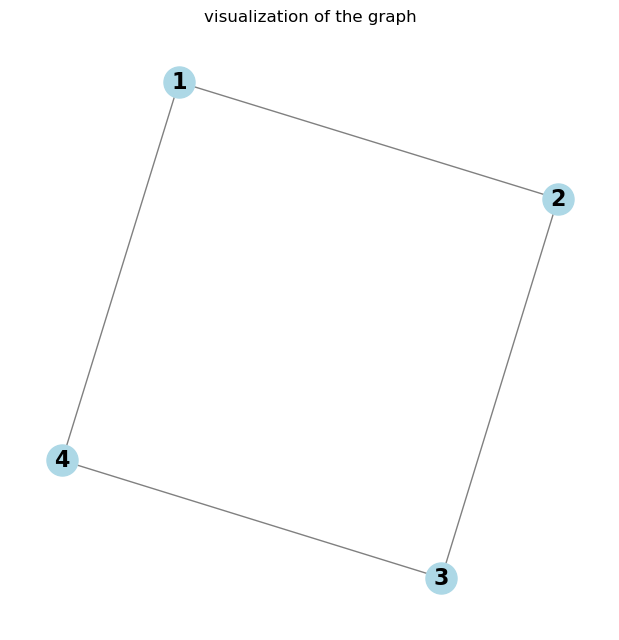

In [33]:
#Q6
import networkx as nx
import matplotlib.pyplot as plt

user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', font_size=16, font_weight='bold')
plt.title("visualization of the graph")
plt.show()

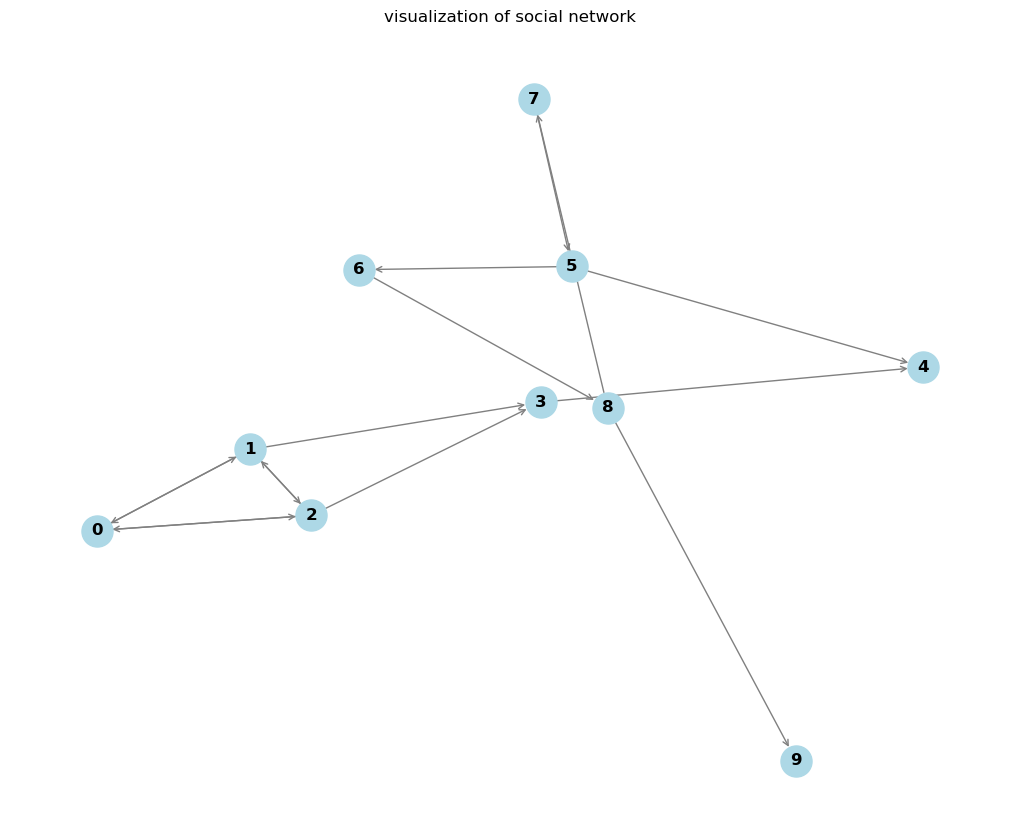

In [34]:
#Q7
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', font_size=12, font_weight='bold', arrows=True, arrowstyle='->', arrowsize=10)
plt.title("visualization of social network")
plt.show()

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


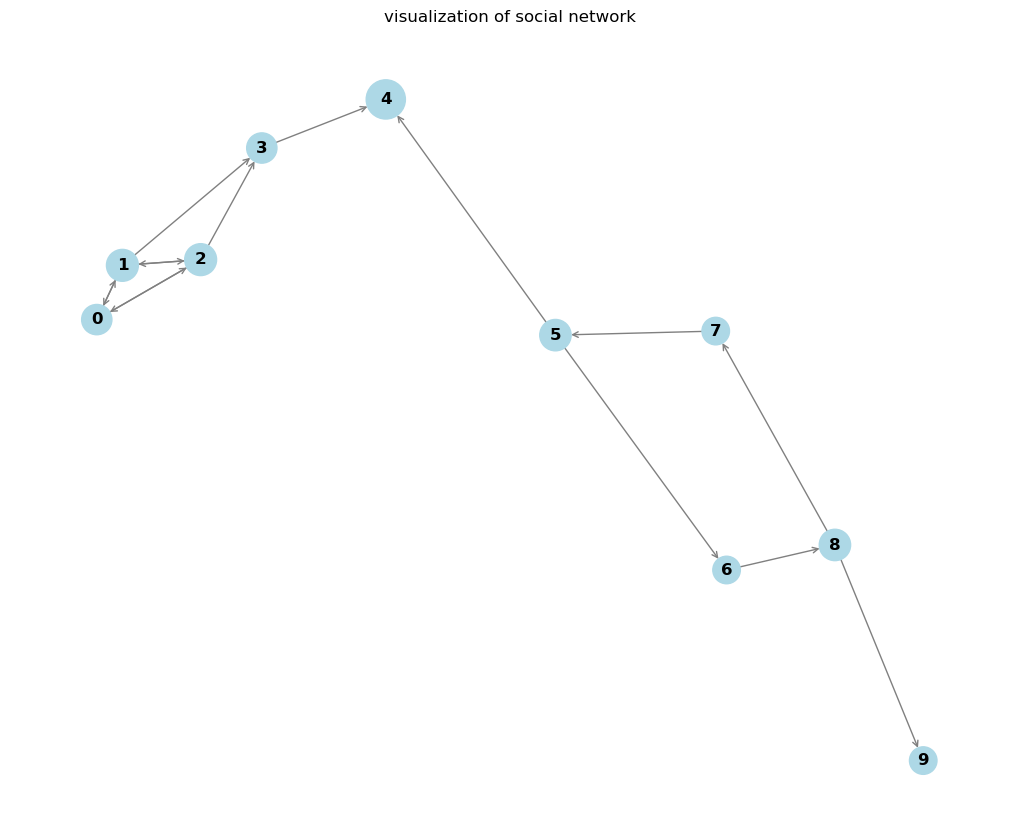

In [38]:
#Q8
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

pagerank = nx.pagerank(G)
for node, pr in pagerank.items():
    print(f"Node {node}: PageRank = {pr:.4f}")

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 

node_sizes = [pagerank[node] * 5000 for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, edge_color='gray', font_size=12, font_weight='bold', arrows=True, arrowstyle='->', arrowsize=10)
plt.title("visualization of social network")
plt.show()